<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/linear_op_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autorch >log.txt

In [2]:
import pandas as pd
import joblib
import autorch
from torch import nn#
from torch.optim import Adam

# c620 模擬數據

  0%|          | 1/300 [00:00<02:09,  2.30it/s]

epoch:0 train_loss:0.0456 valid_loss:0.0135


 17%|█▋        | 52/300 [00:10<00:47,  5.23it/s]

epoch:50 train_loss:0.0006 valid_loss:0.0006


 34%|███▎      | 101/300 [00:20<00:37,  5.26it/s]

epoch:100 train_loss:0.0006 valid_loss:0.0006


 51%|█████     | 152/300 [00:29<00:29,  5.07it/s]

epoch:150 train_loss:0.0006 valid_loss:0.0006


 67%|██████▋   | 202/300 [00:39<00:18,  5.25it/s]

epoch:200 train_loss:0.0006 valid_loss:0.0006


 84%|████████▍ | 252/300 [00:49<00:09,  5.23it/s]

epoch:250 train_loss:0.0006 valid_loss:0.0006


100%|██████████| 300/300 [00:58<00:00,  5.11it/s]


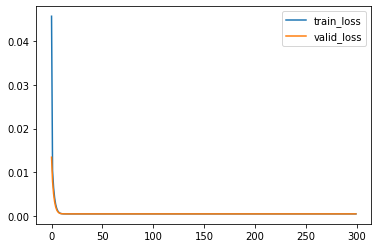

In [3]:
# load data
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0)
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c620_df_real[op_col].dropna(axis=1).columns.tolist()

# modeling
c620_op_model = autorch.utils.PartBulider(c620_df,x_col,op_col,limit_y_range=True)
c620_op_model.net = nn.Linear(len(x_col),len(op_col))
c620_op_model.optimizer = Adam(c620_op_model.net.parameters())
c620_op_model.train()

In [4]:
# test
c620_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,1,4.32627e-14,2.11952e-05
Density_Vent Gas Production Rate and Composition,0.971682,7.08341e-07,0.129371
Density_Distillate Production Rate and Composition,0.916655,9.42952e-06,0.280832
Density_Sidedraw Production Rate and Composition,0.999756,2.70238e-10,0.00138934
Density_Bottoms Production Rate and Composition,0.998666,2.27069e-11,0.000493052
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.992061,1.00565,0.602132
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.955534,0.0585076,0.117002
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.996259,0.00286727,0.023484
AVG,0.978827,0.133379,0.144341


In [5]:
import joblib
# save
joblib.dump(c620_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op.pkl']

# c620遷移學習

In [6]:
# use pretrain net continue training
from copy import deepcopy
pretrain_net = deepcopy(c620_op_model.net.train())
print(pretrain_net)

Linear(in_features=44, out_features=8, bias=True)


In [7]:
c620_op_model = autorch.utils.PartBulider(c620_df_real,x_col,op_col,limit_y_range=True) # use real data  
c620_op_model.net = pretrain_net # use pretrain net
c620_op_model.optimizer = Adam(c620_op_model.net.parameters())

  9%|▉         | 28/300 [00:00<00:01, 268.44it/s]

epoch:0 train_loss:0.1266 valid_loss:0.1150


 20%|██        | 60/300 [00:00<00:00, 280.58it/s]

epoch:50 train_loss:0.0126 valid_loss:0.0127


 31%|███       | 92/300 [00:00<00:00, 289.60it/s]

epoch:100 train_loss:0.0088 valid_loss:0.0097


 51%|█████     | 153/300 [00:00<00:00, 294.57it/s]

epoch:150 train_loss:0.0072 valid_loss:0.0086


 62%|██████▏   | 186/300 [00:00<00:00, 302.23it/s]

epoch:200 train_loss:0.0062 valid_loss:0.0080


 81%|████████  | 243/300 [00:00<00:00, 288.10it/s]

epoch:250 train_loss:0.0056 valid_loss:0.0076


100%|██████████| 300/300 [00:01<00:00, 296.05it/s]


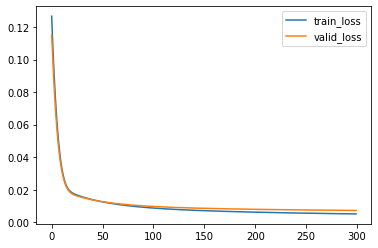

In [8]:
c620_op_model.train()

In [9]:
# test
c620_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,0,4.30934e-05,0.532804
Density_Vent Gas Production Rate and Composition,0,0.00164217,6.63467
Density_Distillate Production Rate and Composition,0.813617,2.59258e-06,0.157499
Density_Sidedraw Production Rate and Composition,0,8.87794e-06,0.191589
Density_Bottoms Production Rate and Composition,0.725282,1.9582e-07,0.0444933
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.595092,9.64607,2.24839
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.0218775,4.47022,1.03042
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.0623121,0.278092,0.238594
AVG,0.277273,1.79951,1.38481


In [10]:
# save
joblib.dump(c620_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl']

# c660 模擬數據

  0%|          | 1/300 [00:00<00:56,  5.26it/s]

epoch:0 train_loss:0.0433 valid_loss:0.0150


 17%|█▋        | 52/300 [00:10<00:48,  5.14it/s]

epoch:50 train_loss:0.0008 valid_loss:0.0008


 34%|███▍      | 102/300 [00:20<00:38,  5.20it/s]

epoch:100 train_loss:0.0007 valid_loss:0.0007


 51%|█████     | 152/300 [00:29<00:28,  5.19it/s]

epoch:150 train_loss:0.0007 valid_loss:0.0007


 67%|██████▋   | 202/300 [00:39<00:18,  5.22it/s]

epoch:200 train_loss:0.0007 valid_loss:0.0007


 84%|████████▍ | 252/300 [00:49<00:09,  5.21it/s]

epoch:250 train_loss:0.0007 valid_loss:0.0007


100%|██████████| 300/300 [00:58<00:00,  5.13it/s]


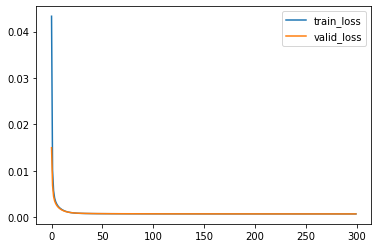

In [11]:
# load data
c660_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c660_train.csv',index_col=0)
c660_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c660_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c660_df_real[op_col].dropna(axis=1).columns.tolist()

# modeling
c660_op_model = autorch.utils.PartBulider(c660_df,x_col,op_col,limit_y_range=True)
c660_op_model.net = nn.Linear(len(x_col),len(op_col))
c660_op_model.optimizer = Adam(c660_op_model.net.parameters())
c660_op_model.train()

In [12]:
c660_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,0.999998,1.63703e-12,0.000113364
Density_Vent Gas Production Rate and Composition,0.982486,5.54585e-06,0.340959
Density_Distillate (Benzene Drag) Production Rate and Composition,0.971312,2.21198e-06,0.131212
Density_Sidedraw (Benzene )Production Rate and Composition,0.990964,9.3691e-13,8.6604e-05
Density_Bottoms Production Rate and Composition,0.992163,6.2381e-10,0.00210627
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0.957144,37.2705,3.78521
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0.933668,0.00300604,0.0511233
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0.904525,0.0760016,0.234158
AVG,0.966532,4.66869,0.568121


In [13]:
joblib.dump(c660_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op.pkl']

# c660遷移學習

In [14]:
pretrain_net = deepcopy(c660_op_model.net.train())
print(pretrain_net)

Linear(in_features=43, out_features=8, bias=True)


In [15]:
c660_op_model = autorch.utils.PartBulider(c660_df_real,x_col,op_col,limit_y_range=True) # use real data  
c660_op_model.net = pretrain_net # use pretrain net
c660_op_model.optimizer = Adam(c660_op_model.net.parameters())

 21%|██▏       | 64/300 [00:00<00:00, 302.46it/s]

epoch:0 train_loss:0.2390 valid_loss:0.2274
epoch:50 train_loss:0.0306 valid_loss:0.0321


 54%|█████▍    | 162/300 [00:00<00:00, 315.44it/s]

epoch:100 train_loss:0.0184 valid_loss:0.0218
epoch:150 train_loss:0.0128 valid_loss:0.0166


 85%|████████▌ | 255/300 [00:00<00:00, 299.58it/s]

epoch:200 train_loss:0.0098 valid_loss:0.0138
epoch:250 train_loss:0.0082 valid_loss:0.0121


100%|██████████| 300/300 [00:00<00:00, 304.43it/s]


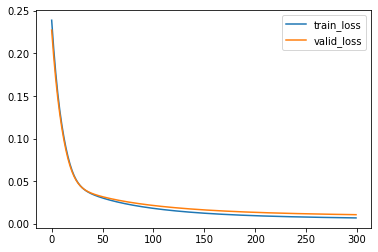

In [16]:
c660_op_model.train()

In [17]:
# save
joblib.dump(c660_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op_real_data.pkl']

# c670 模擬數據

In [39]:
# load data
import numpy as np
c670_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c670_train.csv',index_col=0)
c670_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c670_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c670_col_names.pkl')

In [40]:
# 根據條件修改值
def change_value(df):
  a = df[c['upper_bf']]
  紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
  紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
  紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
  紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
  df.loc[:,紫色零點零欄位] = 0.0001 
  df.loc[:,紫色零點一欄位] = 0.0001 
  df.loc[:,紫色零點九欄位] = 0.9999
  df.loc[:,紫色一點零欄位] = 0.9999
  return df

In [41]:
c670_df = change_value(c670_df)

In [42]:
c670_df_real = change_value(c670_df_real)

In [43]:
x_col = c['combined'] + c['upper_bf']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c670_df_real[op_col].dropna(axis=1).columns.tolist()

  1%|          | 2/300 [00:00<00:58,  5.11it/s]

epoch:0 train_loss:0.0214 valid_loss:0.0046


 17%|█▋        | 52/300 [00:10<00:48,  5.09it/s]

epoch:50 train_loss:0.0002 valid_loss:0.0002


 34%|███▍      | 102/300 [00:20<00:39,  5.03it/s]

epoch:100 train_loss:0.0001 valid_loss:0.0001


 51%|█████     | 152/300 [00:30<00:29,  5.05it/s]

epoch:150 train_loss:0.0001 valid_loss:0.0001


 67%|██████▋   | 201/300 [00:40<00:19,  4.96it/s]

epoch:200 train_loss:0.0001 valid_loss:0.0001


 84%|████████▎ | 251/300 [00:50<00:10,  4.89it/s]

epoch:250 train_loss:0.0001 valid_loss:0.0001


100%|██████████| 300/300 [01:00<00:00,  5.00it/s]


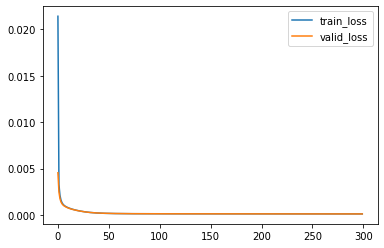

In [46]:
c670_op_model = autorch.utils.PartBulider(c670_df,x_col,op_col,limit_y_range=True)
c670_op_model.net = nn.Linear(len(x_col),len(op_col))
c670_op_model.optimizer = Adam(c670_op_model.net.parameters())
c670_op_model.train()

In [47]:
c670_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Distillate Production Rate and Composition,0.999691,2.47025e-13,4.59324e-05
Density_Bottoms Production Rate and Composition,0.999898,1.85822e-11,0.000382229
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0.990447,5.97733,0.74411
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0.97836,0.001325,0.0155131
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0.997148,0.00784846,0.03187
AVG,0.993109,1.1973,0.158384


In [48]:
joblib.dump(c670_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op.pkl']

# c670 遷移學習

In [49]:
pretrain_net = deepcopy(c670_op_model.net.train())
print(pretrain_net)

Linear(in_features=82, out_features=5, bias=True)


In [50]:
c670_op_model = autorch.utils.PartBulider(c670_df_real,x_col,op_col,limit_y_range=True) # use real data  
c670_op_model.net = pretrain_net # use pretrain net
c670_op_model.optimizer = Adam(c670_op_model.net.parameters())

 22%|██▏       | 65/300 [00:00<00:00, 319.78it/s]

epoch:0 train_loss:0.0780 valid_loss:0.0675
epoch:50 train_loss:0.0123 valid_loss:0.0151


 53%|█████▎    | 159/300 [00:00<00:00, 308.16it/s]

epoch:100 train_loss:0.0093 valid_loss:0.0135
epoch:150 train_loss:0.0076 valid_loss:0.0128


 84%|████████▍ | 252/300 [00:00<00:00, 305.52it/s]

epoch:200 train_loss:0.0063 valid_loss:0.0123
epoch:250 train_loss:0.0055 valid_loss:0.0119


100%|██████████| 300/300 [00:00<00:00, 307.64it/s]


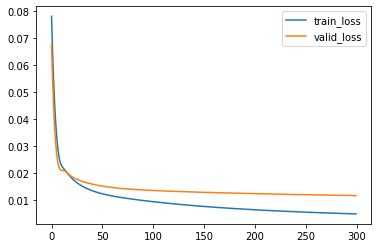

In [51]:
c670_op_model.train()

In [52]:
c670_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Distillate Production Rate and Composition,0,0.00226958,4.42103
Density_Bottoms Production Rate and Composition,0.00391536,1.5372e-06,0.060306
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,97.2477,3.27445
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,1.76165,0.571879
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,1.28673,0.383227
AVG,0.000783073,20.0597,1.74218


In [53]:
joblib.dump(c670_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op_real_data.pkl']